# Évaluation des enseignements `python-primer`, `python-numérique` et `python-dataviz`

## Quelques informations générales *à lire SVP*

----------



   - l'objectif des 3 séances de cours en présentiel était de vous *lancer* dans l'apprentissage de techniques nécessaires à vos futurs enseignements;
   
   

   - vous avez maintenant une *idée générale* de ce qu'on peut faire à partir de `python-primer` et de *ses* bibliothèques de programmes: `numpy`, `pandas`, `matplotlib.pyplot`;
   
  
----------

   - ces notebooks sont très complets: ils abordent, expliquent et illustrent de nombreuses notions qui vous seront utiles par la suite (les autres enseignants les complèteront);
   


   - tous les groupes n'ont pas vu exactement les mêmes slides, vos enseignants se sont adaptés en sélectionnant certaines parties (de la grande quantité) des notebook disponibles;
   
  
   
----------

   - maintenant, comme prévu dans la définition des ECTS, à vous de travailler les notions sur votre temps libre
   
   
   
   - vous pouvez, par exemple, parcourir les notebooks en allant rechercher des informations ou des exemples plus avancés dans les documentations des librairies sur Internet;
   
   
   - vous pouvez terminer les exercices qui vous ont été proposés pendant les cours et revenir vers nous si vous avez des questions;
   
   

## Votre évaluation *à lire SVP*

   - tous les ECTS s'évaluent, aussi nous vous proposons de travailler **sur la plateforme nbhosting, ce notebook qui sera votre évaluation**;
   
   
   - cela vous permettra aussi de (re)travailler les notions de python-primer, numérique et dataviz qui vous seront utiles pour la suite;
 
   
   - les exercices sont tous de niveau moyen, pas de niveau avancé pour cette évaluation;
   
  
   - **ATTENTION: votre notebook sera automatiquement relevé sur la plateforme le lundi 4 novembre à 20h00** (*notebook vide = mauvaise évaluation*)
   
  
   - nous restons disponibles pour toutes vos questions (ces informations seront relayées sur discourse);
   

*Quand les exercices font partie d'une série d'exercices, faites les dans l'ordre, ils se servent des précédents...**

## I. Indiquer la version de `python`

In [3]:
python3 --version


NameError: name 'python3' is not defined

## II. Manipulation des listes, dictionnaires et autres outils

**Consigne** : compter le nombre d'occurrences des mots d'un texte. Le texte est stocké dans la variable d'entrée de votre fonction `texte`. Le texte est composé de phrases séparées par des points. Aucun autre signe de ponctuation n'est utilisé. L'objectif est de retourner une liste de tuples où chaque tuple contient un mot et son nombre d'occurrences. La liste doit être classée du mot le plus régulier à celui le moins utilisé.

**Exemple** :

In [4]:
def compte_occurrence(texte):
    texte=texte.replace('.',' ')
    texte=texte.lower()
    liste_mots=texte.split()
    ensemble_mots=set(liste_mots)
    compteur=[]
    for el in ensemble_mots:
        occurrences=liste_mots.count(el)
        if len(compteur)==0:
            compteur.append((el,occurrences))
        else:
            k=0
            nombre=compteur[k][1]
            while occurrences<nombre and k<len(compteur):
                k+=1
            compteur=compteur[:k]+[(el,occurrences)]+compteur[k:]
    return compteur
compte_occurrence("Youplaboum python est super youplaboum.")
# doit retourner une liste ressemblant à :
#  [('youplaboum', 2), ('python', 1), ('est', 1), ('super', 1)]

[('youplaboum', 2), ('super', 1), ('python', 1), ('est', 1)]

## III. Les classes

consigne:
   - nous voulons que le code python suivant fonctionne
   - pour cela vous allez devoir implémenter une classe et ses méthodes

In [1]:
def ppcm(a,b):
    p=a*b
    while(a!=b):
        if (a<b): b-=a
        else: a-=b
    return p/a

class Rational:
    def __init__(self, *num_den):
        if len(num_den)==1: #cas entier
            num=num_den[0]
            den=1
        elif len(num_den)==0: #cas zéro
            num=0
            den=1
        elif len(num_den)==2: #cas fraction
            num,den=num_den
        self.num=int(num)
        self.den=int(den)
        if den==0:
            raise ValueError("Le dénominateur ne peut pas être nul.")
        self.value=num/den
    def __repr__(self):
        if self.den==1:
             return f"{self.num}"
        return f"{self.num}/{self.den}"
    def __eq__(self, other):
        if isinstance(other,Rational):
            return self.value == other.value
        else:
            return self.value == other
    def __add__(self, other):
        if not isinstance(other,Rational):
            other=Rational(int(other))
        elif not isinstance(self,Rational):
            self=Rational(int(self))
        denom=ppcm(self.den,other.den)
        a=denom//self.den
        b=denom//other.den
        new_selfnum=a*self.num
        new_othernum=b*other.num
        return Rational(new_selfnum+new_othernum,denom)
    def __radd__(other, self):
        if not isinstance(other,Rational):
            other=Rational(int(other))
        elif not isinstance(self,Rational):
            self=Rational(int(self))
        denom=ppcm(self.den,other.den)
        a=denom//self.den
        b=denom//other.den
        new_selfnum=a*self.num
        new_othernum=b*other.num
        return Rational(new_selfnum+new_othernum,denom)
    def __mul__(self,other):
        if not isinstance(other,Rational):
            other=Rational(int(other))
        elif not isinstance(self,Rational):
            self=Rational(int(self))
        return Rational(self.num*Rational(int(other.value)).num,self.den*Rational(int(other.value)).den)
    pass

In [2]:
r1 = Rational(1, 3) # construit le rationnel 1/3
r2 = Rational(2, 6) # construit le rationnel 2/6
r3 = Rational(-5) # construit le rationnel -5
r4 = Rational() # construit le rationnel 0
try:
    r5 = Rational (7, 0) # doit lever l'exception ValueError
except ValueError as e:
    print(e) # affiche "Le dénominateur ne peut pas être nul"
    
print(r1 == r2) # doit renvoyer vrai

r = r1 + r2 # crée un rational avec la somme

print(r1) # doit écrire 1/3
print(r)

print(r2 * r3)

help(Rational) # doit afficher la documentation de votre classe 

Le dénominateur ne peut pas être nul.
True
1/3
4/6
-10/6
Help on class Rational in module __main__:

class Rational(builtins.object)
 |  Rational(*num_den)
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |  
 |  __eq__(self, other)
 |      Return self==value.
 |  
 |  __init__(self, *num_den)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __mul__(self, other)
 |  
 |  __radd__(other, self)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __hash__ = None



Pour obtenir quelque chose de propre, il faudrait pouvoir également exécuter le code suivant.

Ces développements sont **facultatifs** mais seraient nécessaires pour être sûr d'avoir un comportement complet et cohérent. Voici quelques conseils : 
* on pourra utiliser la fonction `isinstance` pour tester le type des paramètres des méthodes magiques ;
* pour l'addition *inversée*, regarder du côté de `__radd__`.

In [3]:
print(r3 == -5) # doit renvoyer vrai

print(5 + r1)

try:
    print(r2 + 4.0)
except ValueError as e:
    print(e)

try:
    print(r2 * 4.0)
except ValueError as e:
    print(e)

True
16/3
26/6
8/6


## IV. Importer `numpy` et `pandas`  indiquer la version des bibliothèques

In [4]:
import numpy as np
import pandas as pd
print(np.__version__)
pd.__version__

1.17.2


'0.25.1'

## V. Importer `pyplot` de `matplotlib` et  mettez les plots en `inline` dans le notebook

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## VI. Exercices sur la suite de Syracuse

### La suite de Syracuse

pour chaque $n\in \mathbb{N^*}$, on définit une suite de Syracuse par:
   - $u_0 = n$
   - $u_{p+1}={\begin{cases}{\dfrac {u_{p}}{2}}&{\mbox{si }}u_{p}{\mbox{ est pair,}}\\3u_{p}+1&{\mbox{si }}u_{p}{\mbox{ est impair.}}\end{cases}}$

### Les consignes

   1. la suite s'arrête après le premier $1$
   1. lever une exception si le type de l'argument n'est pas valide (*TypeError*), pensez à utiliser *isinstance*
   1. lever une exception si la valeur de l'argument n'est pas valide (*ValueError*)
   - pensez à mettre un message explicatif dans vos exceptions
   1. mettez un docstring à la fonction

### 1. Implémentation de la suite de Syracuse
   
   - implémenter une fonction **syracuse** qui retourne la liste de la suite des nombres de Syracuse pour un $n$ donné sous les conditions précédentes

par exemple
```python
>>> syracuse(10)
[10, 5, 8, 4, 2, 1]
```

     
**Exécutions**:
   - tester votre fonction dans les cas suivants (n vaut 0, "toto", 4 et 27) en rattrapant les exceptions levées

In [20]:
# EXERCICE
def syracuse(n):
    "Calcule les premiers termes de la suite de syracuse à partir de uo = n"
    if not isinstance(n,int):
        raise TypeError("L'argument doit être un entier")
    elif n<1:
        raise ValueError("L'argument doit être supérieur ou égale à 1")
    u=[n]
    k=0
    while u[k]>1:
        if u[k]%2==0:
            u.append(int(u[k]/2))
        else:
            u.append(int(3*u[k]+1))
        k+=1
    return u
    pass

In [21]:
syracuse(10)

[10, 5, 16, 8, 4, 2, 1]

### 2. Plotter la suite de Syracuse

**[indications]:**
   - les notebooks, sur les figures et sous-figures en matplotlib.pyplot, relatifs à cet exercice sont dans le notebook 3-13
   - attention les sous-figures sont appelées *axis* en matplotlib.pyplot

**[rappels]:**
  - une figure peut être composée de sous-figures
  - les sous-figures sont appelées des *Axis* (pensez toujours: axis = subfigure)
  - voir 3-16-dataviz-figure-and-axe.ipynb (le notebook relatif aux sous-figures sur nbhosting)

   - créer une figure globale de titre *syracuse*
   - créer six sous-figures en une grille de 2 lignes et 3 colonnes en plottant 6 suites de syracuse - par exemple pour les entrées 4, 8, 12, 5, 10 et 20
   - donner la même taille aux sous-figures
   - donner un titre aux sous-figures

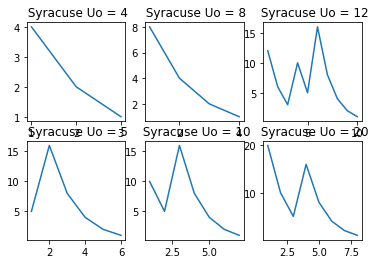

In [24]:
import matplotlib.pyplot as plt
import numpy as np

df = [syracuse(4),syracuse(8),syracuse(12),syracuse(5),syracuse(10),syracuse(20)]
fig, axes = plt.subplots(2, 3)
c=0
for i in range(2):
    for j in range(3):
        axes[i,j].plot(np.linspace(1,len(df[c]),len(df[c])),df[c])
        axes[i,j].set_title(f" Syracuse Uo = {df[c][0]}")
        c+=1
        


## VII. Exercice: vectorization de fonctions

   - implémenter la fonction valeur absolue sans utiliser *numpy.abs* ni aucune fonction numpy dans le corps de la fonction
   - créer un *numpy.ndarray* contenant des flottants linéairement espacés entre -100 et 100
   - appliquez votre fonction à ce tableau
   - quel problème constatez-vous ?

**[indications]**


   - si vous voulez que votre fonction ($abs: float \rightarrow float)$ puisse s'appliquer à des tableaux numpy
   - il faut la vectoriser en utilisant la fonction *numpy.vectorize*

In [28]:
import numpy as np
from math import sqrt

def abs (n):
    return sqrt(n**2)


f = np.vectorize(abs)
L = np.arange(-100, 101, 1)
f(L)
    

# votre code ici
# x = ...
# abs(x)
# pensez à rattraper l'erreur

array([100.,  99.,  98.,  97.,  96.,  95.,  94.,  93.,  92.,  91.,  90.,
        89.,  88.,  87.,  86.,  85.,  84.,  83.,  82.,  81.,  80.,  79.,
        78.,  77.,  76.,  75.,  74.,  73.,  72.,  71.,  70.,  69.,  68.,
        67.,  66.,  65.,  64.,  63.,  62.,  61.,  60.,  59.,  58.,  57.,
        56.,  55.,  54.,  53.,  52.,  51.,  50.,  49.,  48.,  47.,  46.,
        45.,  44.,  43.,  42.,  41.,  40.,  39.,  38.,  37.,  36.,  35.,
        34.,  33.,  32.,  31.,  30.,  29.,  28.,  27.,  26.,  25.,  24.,
        23.,  22.,  21.,  20.,  19.,  18.,  17.,  16.,  15.,  14.,  13.,
        12.,  11.,  10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,
         1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  5

## VIII. 3D plotting

   - cet exercice s'appuie sur le notebook 3-14-dataviz-3D-plots.ipynb

   - implémentez en utilisant les opérateurs et fonctions numpy une fonction (dans le genre de) $f(x, y) = x^2 + y^2$ 
   - plotter votre fonction en 3D
   - *optionnel*: passez en coordonnées paramétriques

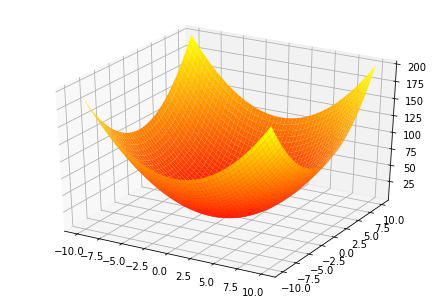

In [10]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def f(x,y):
    return np.power(x,2) + np.power(y,2)
X = np.linspace(-10,10)
Y = np.linspace(-10,10)
X,Y = np.meshgrid(X,Y)
Z = f(X,Y)
fig=plt.figure()
ax=Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap='autumn');

## IX. Travail sur des fichiers `csv`

**[consigne]**
   - ne pas utiliser de boucles python sur les tableaux *csv* 

### 1. Lecture de fichiers csv

#### a. Lecture d'un (petit) csv sans noms de colonnes
   - créer une *pandas.DataFrame* *df1* à partir du (petit) fichier `weight_height_no_names.csv`
   - il ne comporte pas de noms de colonnes
   - passer lui la liste des colonnes =["genre", "taille", "poids"] à la création de la DataFrame
   - afficher la taille de la DataFrame 

In [11]:
import pandas as pd
df1 = pd.read_csv("weight_height_no_names.csv")
df1.columns = ["genre", "taille", "poids"]
df1.size




18

####  b. Lecture d'un (petit) csv avec des lignes de commentaires mais sans noms de colonnes 
   - créer une *pandas.DataFrame* *df2* à partir du (petit) fichier `weight_height_no_comments.csv`
   - les valeurs sont séparées par des ';'
   - ce fichier comporte 3 lignes de commentaires
   - il ne comporte pas de noms de colonnes
   - mettez dans la DataFrame existante la liste de colonnes: ["Gender", "Height", "Weight"]

In [29]:
import pandas as pd
df2 = pd.read_csv("weight_height_no_comments.csv", sep=';', skiprows=3)
df2.columns = ["Gender", "Weight", "Height"]
df2.head()


,Gender,Weight,Height
0,Male,64.766329,167.127461
1,Male,69.283070,189.446181
2,Male,69.243732,186.434168
3,Male,67.645620,172.186930
4,Male,72.418317,196.028506


#### c. Lecture d'un (gros) fichier csv avec le nom des colonnes et sans commentaires
   - créer une *pandas.DataFrame* *df* à partir du (gros) fichier `weight_height.csv`
   - les valeurs sont séparées par des ';'
   - la première ligne comporte le nom des colonnes
   - cette DataFrame servira dans les fonctions suivantes

In [30]:
df = pd.read_csv("weight_height.csv")
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### 2. Informations générales sur une DataFrame

on manipule la DataFrame *df* précédente

   1. afficher la taille du tableau
   
   1. afficher les quelques (5) premiers éléments du tableau
   
   1. afficher les types des colonnes
   
   1. afficher les informations générale sur la DataFrame

In [31]:
df.size
df.head(5)
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


### 3. Manipulations des colonnes de la DataFrame

   - convertissez les tailles de *inches* à *mètres* ($cm = in \times 2.54$)
   - convertissez les poids de *pounds* à *kg* ($kg = \dfrac{lb}{2.2046}$)
  
  
   - remplacer la colonne "Gender" par une colonne avec la valeur 1 pour les homme et 2 pour les femmes
   - compter le nombre de valeurs différentes dans la colonne "Gender"
   
   - calculer l'indice de masse corporelle (dans le genre: poids/taille au carré) et stoquer-le dans une colonne de la DataFrame

In [37]:
df3 = pd.read_csv("weight_height.csv")
df.loc[df['Gender']=='Male', 'Gender'] = 1
df.loc[df['Gender']=='Female', 'Gender'] = 2
print(df['Gender'].value_counts())
df['Height'] = df3['Height']*2.54/100
df['Weight'] = df3['Weight']/2.2046
df['IMC'] = df['Weight']/(df['Height']**2)
df.head()



2    5000
1    5000
Name: Gender, dtype: int64


,Gender,Height,Weight,IMC
0,1,1.875714,109.722200,31.186107
1,1,1.747060,73.623547,24.121312
2,1,1.882397,96.498619,27.233208
3,1,1.821967,99.810610,30.067392
4,1,1.774998,93.599656,29.708362


### 4. Plots de colonnes de la DataFrame

####   a. les boxplots
   1. tracer le *boxplot* de la colonne *height*

   1. tracer le *boxplot* de la colonne *weight*

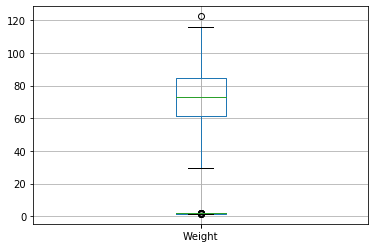

In [17]:
df.boxplot(['Height'])
df.boxplot(['Weight'])

#### b. Plot d'une colonne en fonction d'une autre colonne
   1. tracer les tailles en fonction des poids en discriminant le genre par des couleurs
  
   1. tracer les tailles des femmes en fonction de leurs poids

   1. tracer les tailles des hommes en fonction de leurs poids

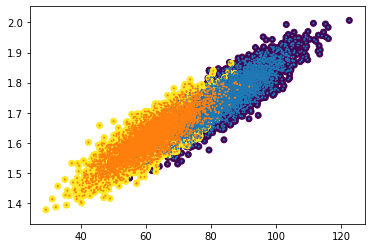

In [18]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['Weight'], df['Height'], c=df['Gender'])
plt.scatter(df['Weight'], df['Height'], df['Gender'] == 1)
plt.scatter(df['Weight'], df['Height'], df['Gender'] == 2)



#### c. Tri de colonnes et plots
   1. trier les tailles en ordre croissant et plotter les
   1. plotter sur une même figure les tailles par genre
   1. afficher les personnes de plus de 180 cm

,Gender,Height,Weight,IMC,Indice
0,1,1.875714,109.722200,31.186107,0
2,1,1.882397,96.498619,27.233208,2
3,1,1.821967,99.810610,30.067392,3
10,1,1.808363,84.643439,25.883453,10
11,1,1.819676,96.952358,29.279930,11
...,...,...,...,...,...
8135,2,1.817426,84.214039,25.495940,8135
8464,2,1.805189,82.592570,25.345181,8464
8635,2,1.831053,87.331427,26.047652,8635
8736,2,1.802147,87.646705,26.987043,8736


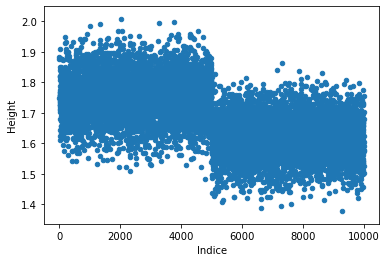

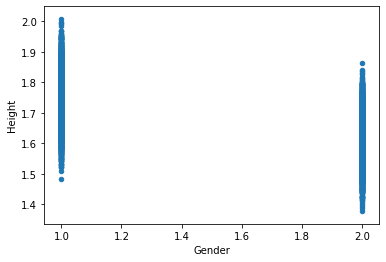

In [43]:
df.sort_values(by='Height')
df['Indice'] = pd.Series(np.arange(0,10000, 1))
df.plot.scatter(x = 'Indice', y = 'Height')
df.plot.scatter(x = 'Gender', y = 'Height')
df.loc[df['Height']>1.80]

### 5. statistiques simples 
   - afficher les statistiques simples de la DataFrame

In [44]:
df.describe()

,Gender,Height,Weight,IMC,Indice
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,1.500000,1.685736,73.228865,25.475739,4999.50000
std,0.500025,0.097727,14.564292,2.693840,2886.89568
min,1.000000,1.378284,29.347785,15.448921,0.00000
25%,1.000000,1.613043,61.606664,23.465067,2499.75000
50%,1.500000,1.684479,73.125704,25.733601,4999.50000
75%,2.000000,1.757026,84.899540,27.558841,7499.25000
max,2.000000,2.006568,122.466524,33.028469,9999.00000


## X. NaN

**[cours]**
   - les valeurs manquantes sont traitées dans le notebook `3-06-pandas-missing-data.ipynb`

### 1. Lecture du csv
   - lisez le fichier `car_sales.csv` (la première ligne contient le nom des colonnes)
   - afficher les colonnes
   - afficher les 5 première lignes

In [45]:
cs=pd.read_csv("car_sales.csv")
cs.columns
cs.head(5)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


###   2. Nombres de NaN
   - calculer et afficher le nombre de NaN par ligne et par colonne
   - (sans boucle python)

In [46]:
cs_count_col = cs.count()
cs_count_row = cs.count(1)
16 - cs_count_row
157 - cs_count_col

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

### 3. Suppression de NaN

#### a.
   - supprimer les lignes (resp.colonnes) qui ont plus de $5$ NaN
   - i.e. garder les lignes (resp. colonnes) qui ont au moins 152 (resp. 11) valeur non-NA

In [47]:
cs.dropna(thresh=11, axis='rows')
cs.dropna(thresh=152, axis= 'columns')

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


#### b.
   - supprimer les lignes qui ont au moins un NaN
   - supprimer les colonnes qui ont au moins un NaN

In [50]:
cs.dropna(how='any', axis=0)
cs.dropna(how='any', axis=1)
cs



,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


## XI. Pivot tables

**[cours]**
   - les "pivot table" dans le notebook `3-11-pandas-pivoting.ipynb`

   - en utilisant le fichier `car_sales.csv`, on aimerait extraire plusieurs informations :
       - la réussite des ventes en fonction du mois de lancement, pour savoir quels sont les mois de l'année les plus favorables ;
       - le prix en fonction de la taille du moteur et de la puissance ;
   - avec la fonction [`pd.pivot_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html), créez les tableaux permettant d'afficher ces données.

In [57]:
def mois(string):
    liste_mots=string.split('/')
    return liste_mots[0]
f = np.vectorize(mois)
cs['Mois'] = f(cs['Latest_Launch'])
cs.pivot_table('Sales_in_thousands', columns='Mois', aggfunc=np.mean)
cs.pivot_table('Price_in_thousands', index='Horsepower', columns='Engine_size',aggfunc=np.mean)




Engine_size,1.0,1.5,1.6,1.8,1.9,2.0,2.2,2.3,2.4,2.5,...,4.0,4.2,4.3,4.6,4.7,5.0,5.2,5.4,5.7,8.0
Horsepower,,,,,,,,,,,,,,,,,,,,,
55.0,9.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92.0,NaN,9.699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100.0,NaN,NaN,NaN,NaN,11.61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106.0,NaN,NaN,12.885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107.0,NaN,NaN,NaN,NaN,NaN,12.315,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46.305,NaN,NaN,NaN,NaN,NaN,NaN,42.66,NaN,NaN
302.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84.05,NaN,NaN,NaN,NaN
310.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
